## TO BEGIN
Add Git repo, import functions I may need

In [133]:
!apt-get install git
!git config --global user.name "jcomita"
!git config --global user.email "jcomita@pratt.edu"
!git clone https://github.com/pratt-ml/supervised-learning-jcomita

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
fatal: destination path 'supervised-learning-jcomita' already exists and is not an empty directory.


In [134]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Add wine dataset
Using  UCI's suggestion for adding their dataset, I am able to view if there are any missing datapoints, as well as do a quick inspection of the data

In [135]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

## **Exploratory data analysis:**
1. check columns to understand datatypes, value ranges
2. find possible missing values
3. the correlation between features
4. create relevant data visualization

Uploaded the red wine specific dataset to my GIT + am including them here so I can process them more easily. NOTE: this dataset is separated by semicolons instead of the standard comma, so I have added a "delimeter" parameter. Without this, all column headings are collapsed into one.

In [136]:
df_wine = pd.read_csv('https://raw.githubusercontent.com/pratt-ml/supervised-learning-jcomita/refs/heads/main/winequality-red.csv', delimiter=';')

In [137]:
df_wine.columns = df_wine.columns.str.replace(' ', '_')

In [138]:
correlation_matrix = df_wine.corr()
print(correlation_matrix)

                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000         -0.256131     0.671703   
volatile_acidity          -0.256131          1.000000    -0.552496   
citric_acid                0.671703         -0.552496     1.000000   
residual_sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free_sulfur_dioxide       -0.153794         -0.010504    -0.060978   
total_sulfur_dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity    

In [139]:
df_wine['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [140]:
df_wine['quality'] = df_wine['quality'].replace(3, 'very_poor')
df_wine['quality'] = df_wine['quality'].replace(4, 'poor')
df_wine['quality'] = df_wine['quality'].replace(5, 'average')
df_wine['quality'] = df_wine['quality'].replace(6, 'good')
df_wine['quality'] = df_wine['quality'].replace(7, 'very_good')
df_wine['quality'] = df_wine['quality'].replace(8, 'excellent')

## Inspect red wine dataset

In [141]:
df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,average


In [142]:
df_wine.shape

(1599, 12)

In [143]:
print(df_wine.dtypes)

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                  object
dtype: object


The UCI data info above already said there were no missing values, but I will double check

In [144]:
missing_values = df_wine.isnull().sum()
print("missing values per column:\n", missing_values)

missing values per column:
 fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Check for any correlations

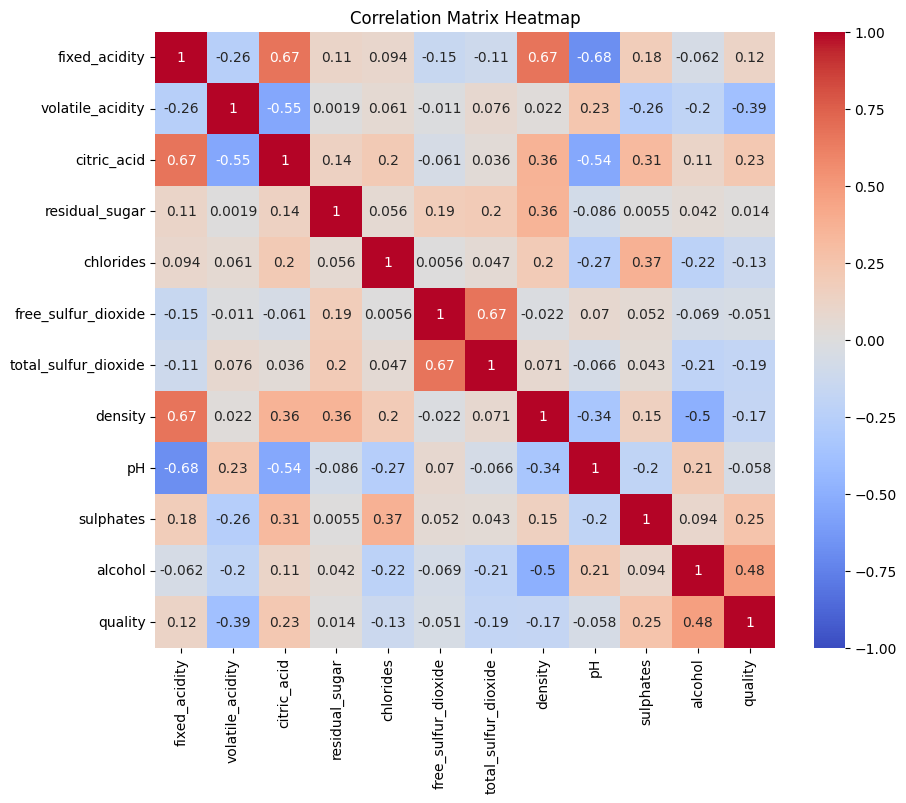

In [145]:
plt.figure(figsize=(10, 8))  # Adjust the figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

## Create a sklearn pipeline that includes preprocessing steps such as scaling and one hot encoding of categorical variable.

Start by importing necessary SKlearn libraries

In [146]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [147]:
X = df_wine.drop(columns=['quality'])
y = df_wine['quality']

In [148]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [149]:
y.head()

,quality
0,average
1,average
2,average
3,good
4,average


***Note here, RE: one hot encoding of categorical variables, all variables appear to be numerical (all float + 1 int)... so do I need one hot encoding?

## Identify numerical columns + create preprocessing transformers

In [150]:
df_wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [151]:
numerical_transformer = StandardScaler()

Create a column transformer, apply transformations

In [152]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns),    # Apply scaling to numeric columns
    ]
)

In [153]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Create a linear classification pipeline

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
model = pipeline.fit(X_train, y_train)

In [156]:
y_pred = model.predict(X_test)

# Evaluate the model for accuracy

In [157]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.57


In [158]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[98  0 32  0  0  0]
 [ 0  0  1  0  4  0]
 [46  0 76  0 10  0]
 [ 7  0  2  1  0  0]
 [ 3  0 30  0  9  0]
 [ 1  0  0  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

     average       0.63      0.75      0.69       130
   excellent       0.00      0.00      0.00         5
        good       0.54      0.58      0.56       132
        poor       1.00      0.10      0.18        10
   very_good       0.39      0.21      0.28        42
   very_poor       0.00      0.00      0.00         1

    accuracy                           0.57       320
   macro avg       0.43      0.27      0.28       320
weighted avg       0.56      0.57      0.55       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Create a non-linear classification pipeline

In [159]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())])

Train the pipeline

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
X_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9


In [162]:
y_train.head()

,quality
493,good
354,good
342,good
834,average
705,average


In [163]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

In [164]:
y_pred = pipeline.predict(X_test)

In [165]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier',
                                                            RandomForestClassifier())])

# Check for accuracy

In [166]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.64


In [167]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[98  0 31  0  1  0]
 [ 0  0  0  0  5  0]
 [35  0 89  0  8  0]
 [ 7  0  3  0  0  0]
 [ 0  1 22  0 19  0]
 [ 1  0  0  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

     average       0.70      0.75      0.72       130
   excellent       0.00      0.00      0.00         5
        good       0.61      0.67      0.64       132
        poor       0.00      0.00      0.00        10
   very_good       0.58      0.45      0.51        42
   very_poor       0.00      0.00      0.00         1

    accuracy                           0.64       320
   macro avg       0.31      0.31      0.31       320
weighted avg       0.61      0.64      0.63       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Run a grid search to improve results

I am running into issues with the "quality" again not being numeric in ways I can't figure out how to mitigate without doing steps that yesterday you said not to do because it's quality is a label. I thought maybe I could do it after running the model (which you'll see the "label encoder" coding below, which is one of several solutions I tried) but it doesn't work.

In [168]:
from sklearn.preprocessing import LabelEncoder

In [169]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [170]:
from sklearn.model_selection import GridSearchCV

In [171]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'class_weight': ['balanced', {0: 1, 1: 2}]
}


In [172]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=param_grid,
                           scoring='f1',
                           cv=5)

In [175]:
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 204, in _get_response_values
    raise ValueError(
ValueErr